In [1]:
import sys
sys.path.append('/NDDepth/src')

In [2]:
from transformers import Swinv2Config, UperNetConfig, UperNetForSemanticSegmentation, AutoImageProcessor
from PIL import Image
from torch import nn
import requests
import matplotlib.pyplot as plt
from newcrf_layers import NewCRF
from model import Model, ModelConfig

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = AutoImageProcessor.from_pretrained("openmmlab/upernet-convnext-tiny")


In [3]:
config =  ModelConfig("large07")
model = Model(config).to("cuda")

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
inputs = processor(images=image, return_tensors="pt").to("cuda")
d1, d2 = model(inputs)

context torch.Size([1, 192, 128, 128])
gru_hidden torch.Size([1, 256, 128, 128])
input_features torch.Size([1, 128, 128, 128])
gru_hidden torch.Size([1, 128, 128, 128])
delta_d torch.Size([1, 2, 128, 128])
input_features torch.Size([1, 128, 128, 128])
gru_hidden torch.Size([1, 128, 128, 128])
delta_d torch.Size([1, 2, 128, 128])
input_features torch.Size([1, 128, 128, 128])
gru_hidden torch.Size([1, 128, 128, 128])
delta_d torch.Size([1, 2, 128, 128])


In [5]:
print(inputs["pixel_values"].shape)

torch.Size([1, 3, 512, 512])


torch.Size([1, 1, 128, 128])


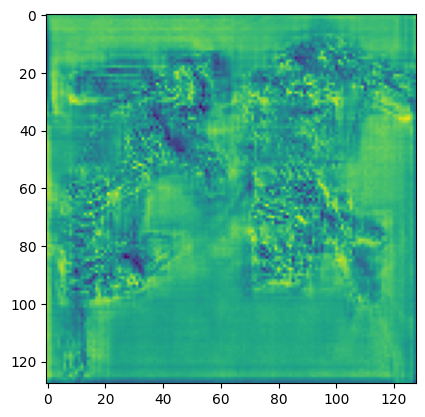

In [6]:
print(d1[-1].shape)
plt.imshow(d1[0].detach().cpu().numpy()[0, 0, :, :])